Saving 2. Diagnose Diabetes.csv to 2. Diagnose Diabetes.csv
Accuracy: 0.7403
Precision: 0.6316
Recall: 0.6545


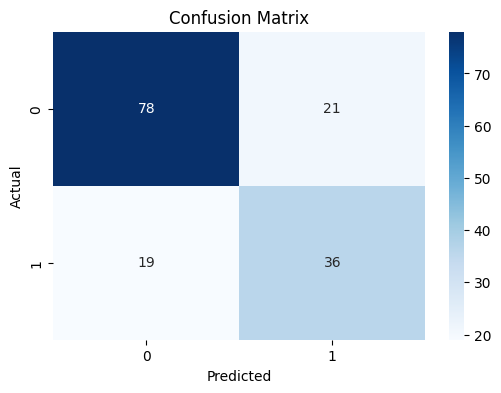

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# ✅ 1. Load dataset from current working directory
df = pd.read_csv("2. Diagnose Diabetes.csv")

# ✅ 2. Replace 0s in selected columns with NaN and fill with median
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].fillna(df[cols_with_zero_as_missing].median())

# ✅ 3. Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# ✅ 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ 6. Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ 7. Predictions
y_pred = model.predict(X_test)

# ✅ 8. Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))

# ✅ 9. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
